### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: 'China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel

In [1]:
from covid_top import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(data)

544

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'07-18-2021'

In [4]:
print("Total recovered first day: ", totalrecovered_by_day[0])
print("Total recovered last day: ", totalrecovered_by_day[-1])

Total recovered first day:  30.0
Total recovered last day:  125377069.0


### New Recovered in the World changed by day

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


('Last day Increasing', 313190.0)

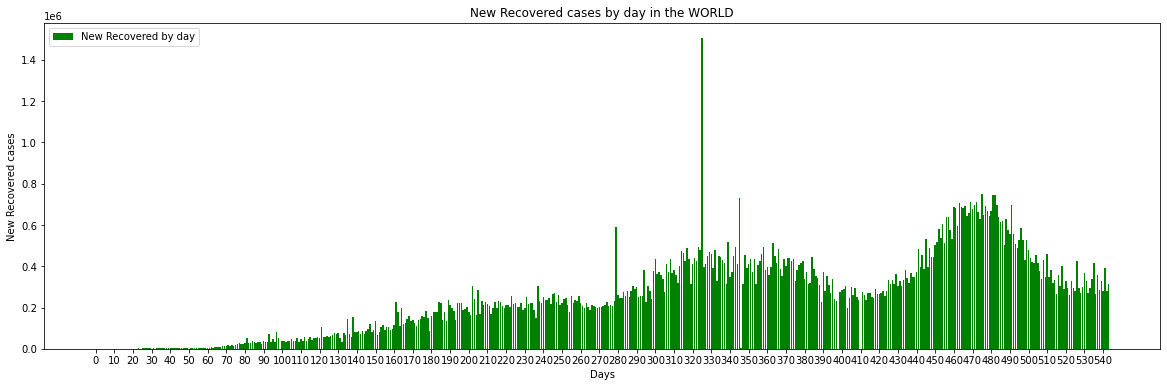

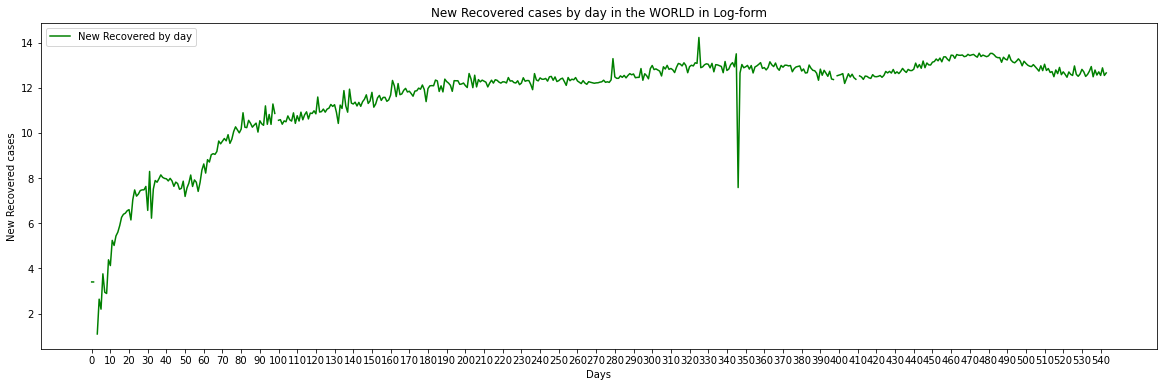

In [5]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("New Recovered cases by day in the WORLD")
plt.legend(loc='upper left')

plt.figure(2)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, np.log(newRecoveredByDay), color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("New Recovered cases by day in the WORLD in Log-form")
plt.legend(loc='upper left')

('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

##### NOTE: THERE IS DATA BIAS AT DAYS with negative values

### Number of RECOVERED in the World from day 0 to latest day

Ratio recovered over Confirmed in last day (%):  65.843
Highest Ratio until now (%):  69.747


('Total Recovered until now: ', 125377069.0)

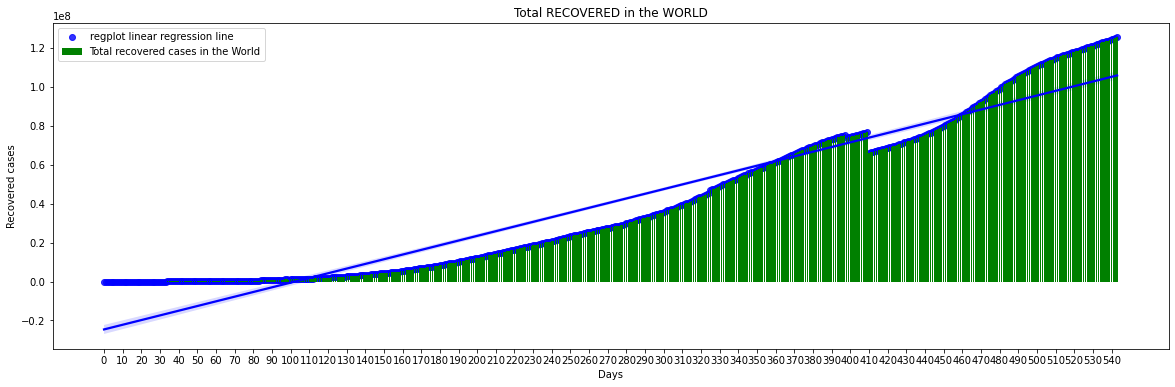

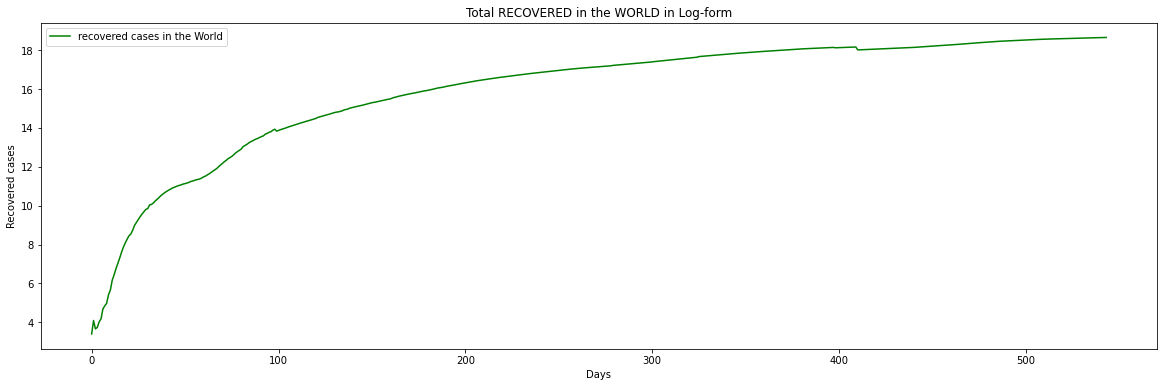

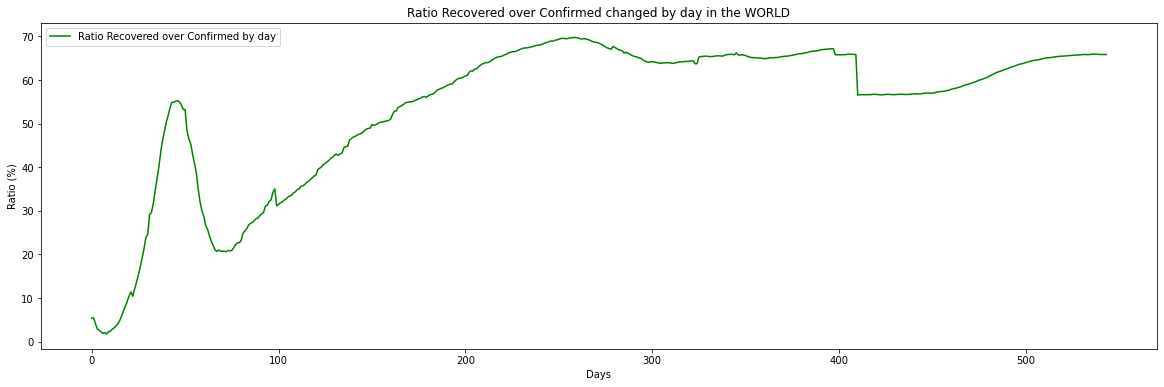

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD")

plt.figure(2)
plt.plot(x_dat, np.log(totalrecovered_by_day), color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD in Log-form")

plt.figure(3)
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.title("Ratio Recovered over Confirmed changed by day in the WORLD")
plt.legend(loc='upper left')

print("Ratio recovered over Confirmed in last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))
('Total Recovered until now: ', totalrecovered_by_day[-1])

,China,Germany,Italy,"Korea, South",Japan,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
539,98727.0,3635420.0,4106315.0,156509.0,789749.0,23911.0,69949.0,16127.0,1397993.0,9624.0,836556.0
540,98739.0,3636120.0,4109579.0,157113.0,791595.0,23920.0,70041.0,16133.0,1398302.0,9688.0,837125.0
541,98769.0,3636960.0,4110649.0,157960.0,793487.0,23935.0,70150.0,16220.0,1398654.0,10020.0,837587.0
542,98796.0,3637480.0,4112977.0,158953.0,795232.0,23939.0,70150.0,16429.0,1398940.0,10312.0,837840.0


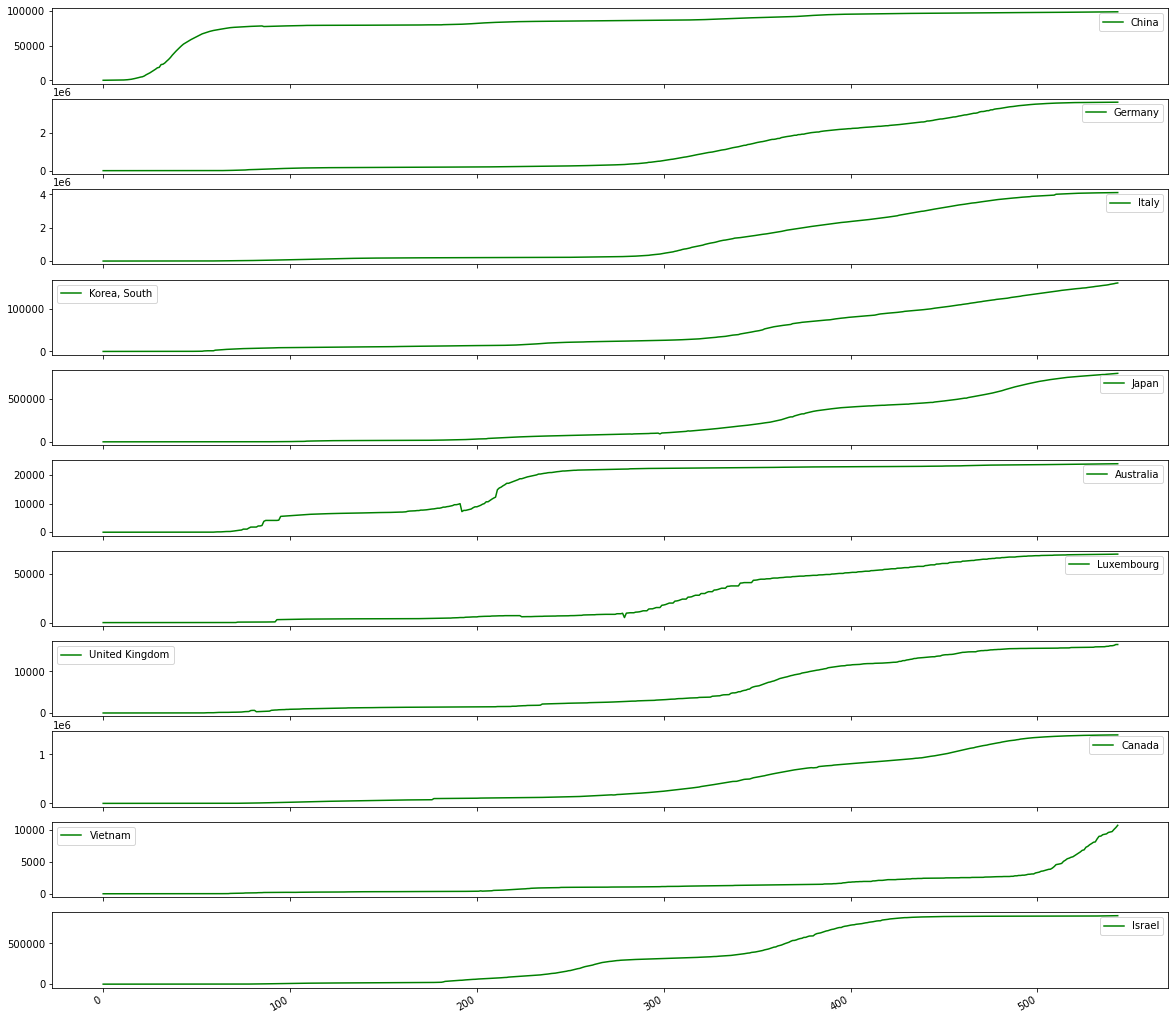

In [7]:
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel']

rcParams['figure.figsize'] = 20, 20
countries_recovered[countries].plot(subplots=True, legend=True, color='green')
countries_recovered[countries]

,China,Germany,Italy,"Korea, South",Japan,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
Last day Increasing,15.0,1240.0,501.0,677.0,1820.0,5.0,0.0,1.0,290.0,355.0,623.0
Total Recovered until yesterday,98811.0,3638720.0,4113478.0,159630.0,797052.0,23944.0,70150.0,16430.0,1399230.0,10667.0,838463.0
Highest Number,3994.0,44517.0,53074.0,2143.0,10998.0,2606.0,4523.0,350.0,23848.0,480.0,18322.0


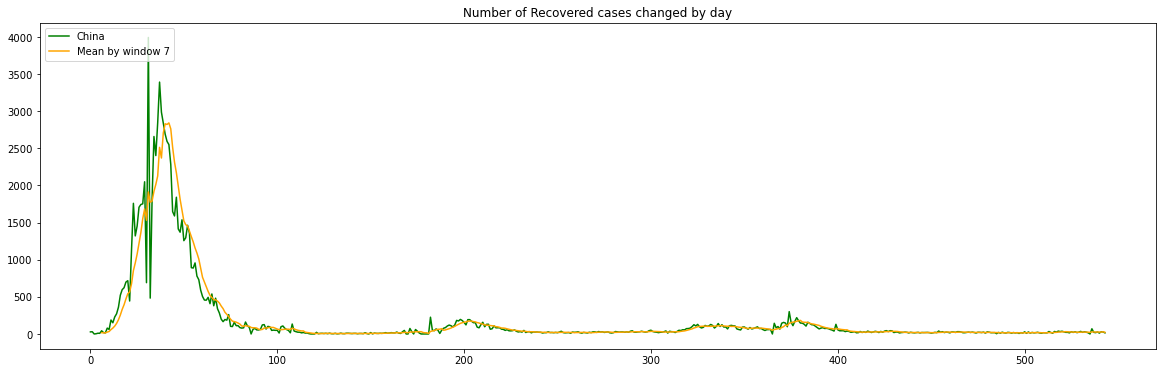

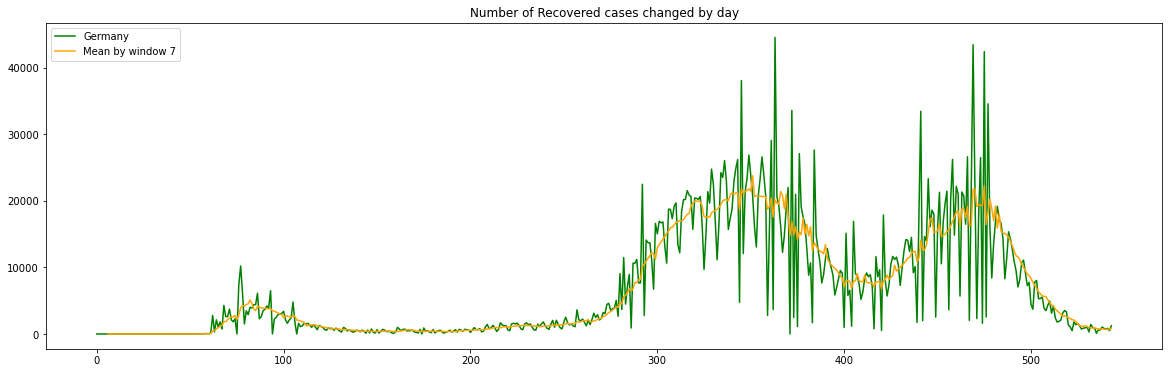

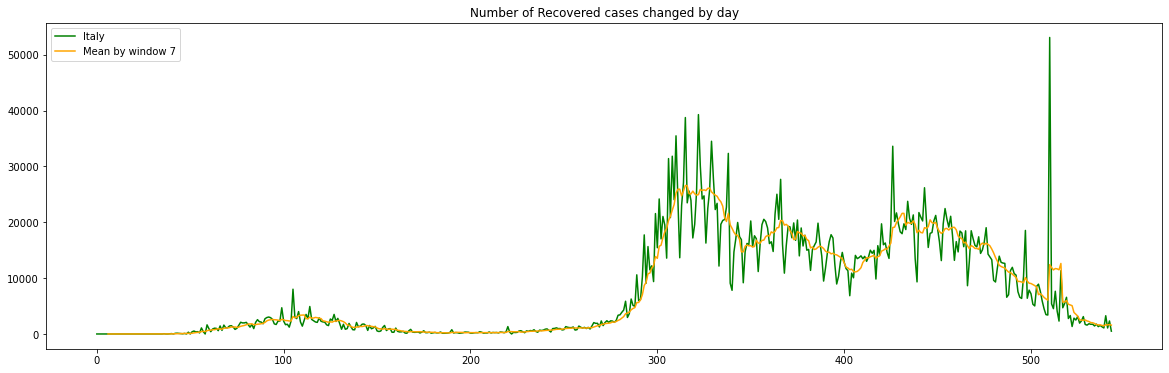

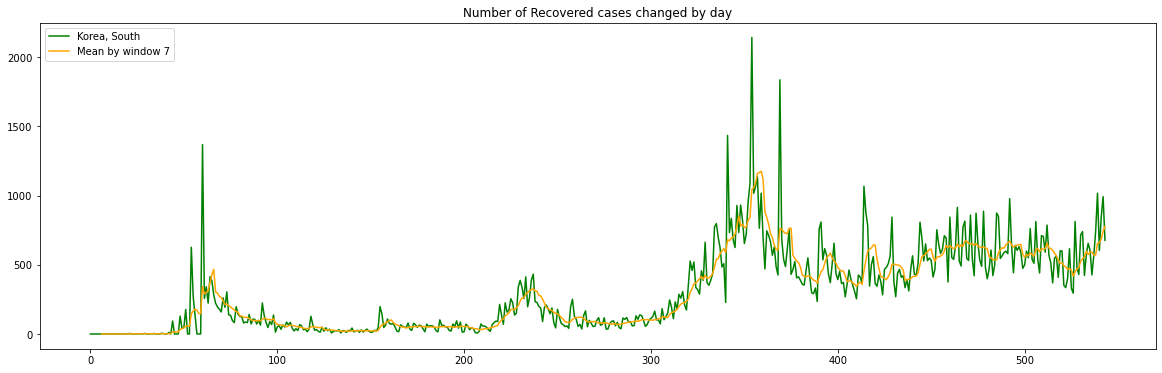

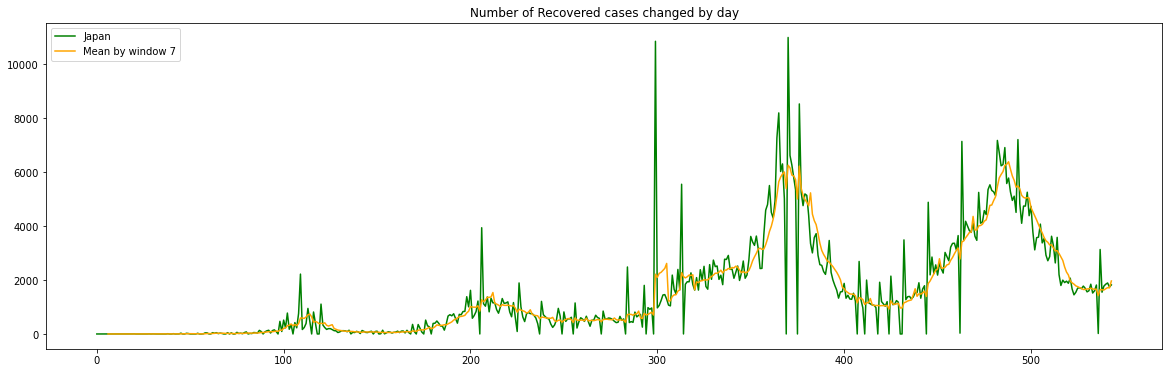

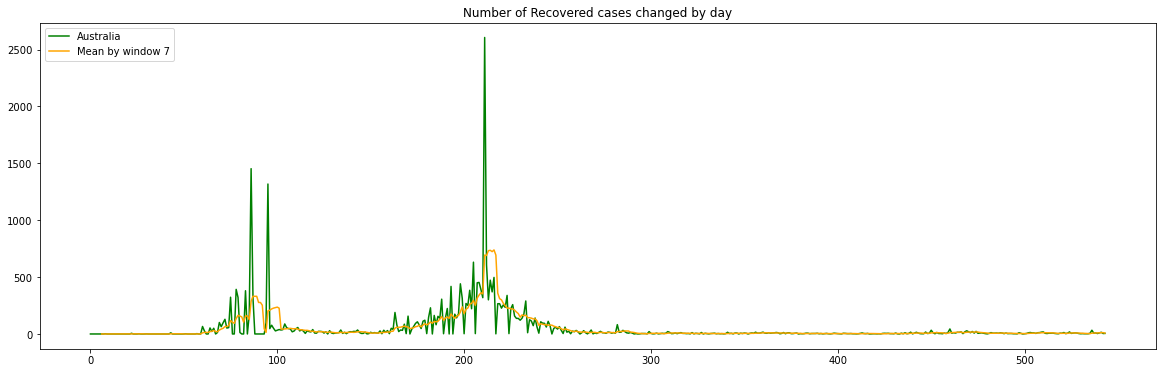

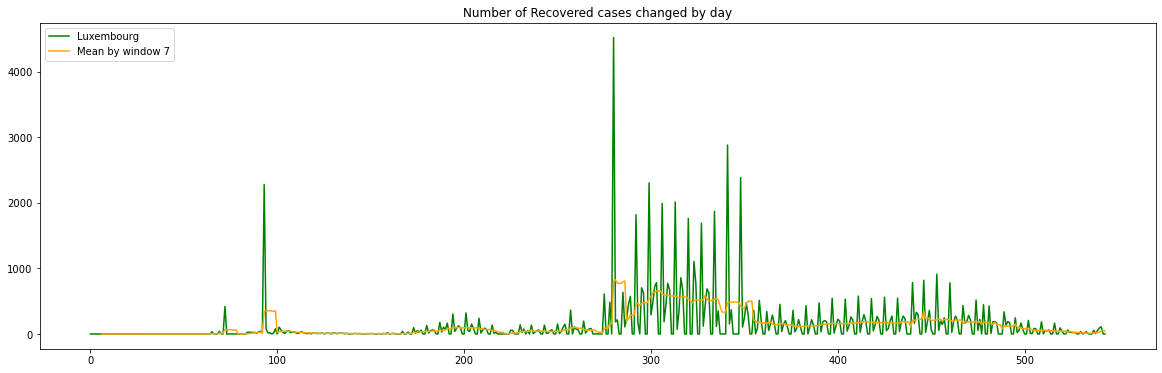

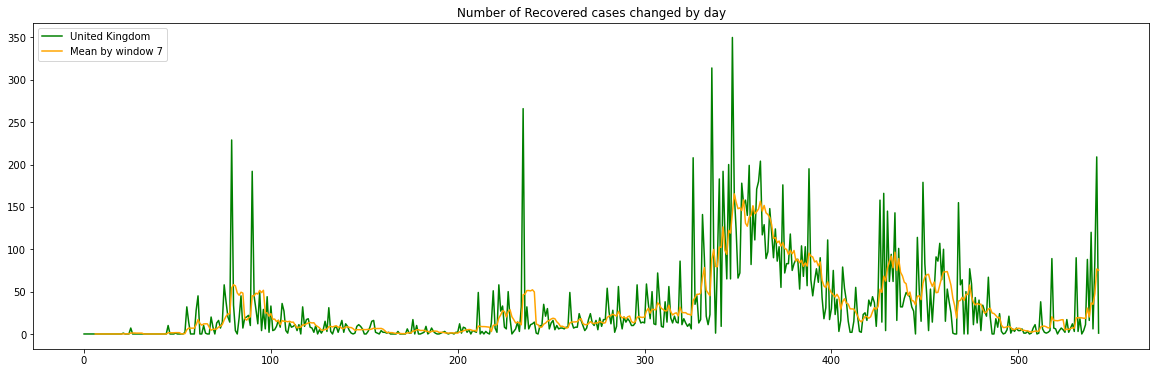

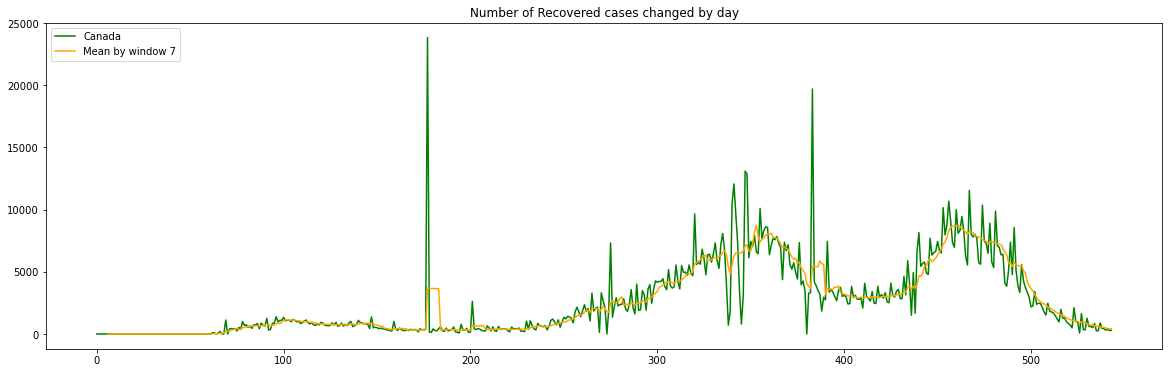

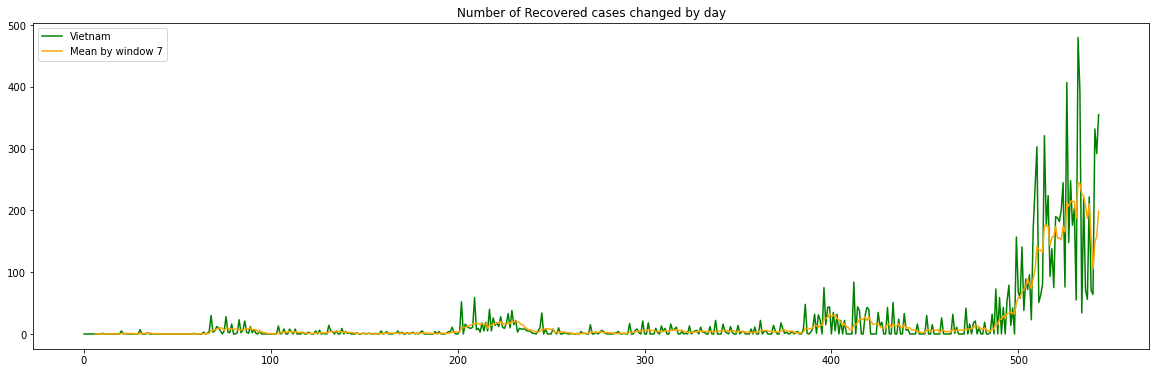

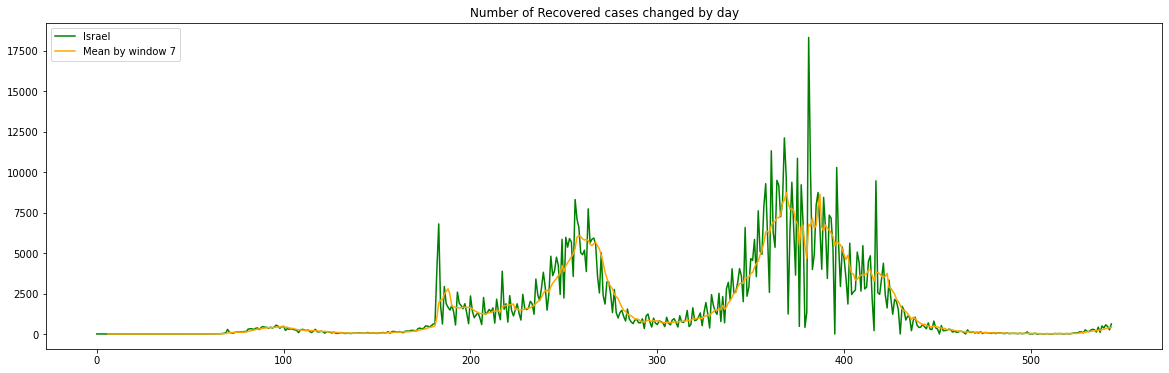

In [8]:
# time slot 7 days
window_slot = 7

countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Recovered until yesterday', 'Highest Number'])

for country in countries:
    countriesdf[country] = [countries_recovered_by_day[country].iloc[-1], countries_recovered[country].iloc[-1], 
                            countries_recovered_by_day[country].max()]

# Mitigate the negative values by converting all negative values to 0
countriesdf.mask(countriesdf<0, 0, inplace=True) 
countries_recovered_by_day.mask(countries_recovered_by_day<0, 0, inplace=True) 

figure = 1
rcParams['figure.figsize'] = 20, 6

for country in countries:    
    plt.figure(figure)
    countries_recovered_by_day[country].plot(color='green', label=country)
    
    roll = countries_recovered_by_day[country].rolling(window = window_slot)
    roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')
    
    plt.title("Number of Recovered cases changed by day")
    plt.legend(loc='upper left')
    figure = figure+1

countriesdf

#### There are bias data found at the days when you see the scattered plot shows the negative values (<0).